In [ ]:
import pandas as pd

df = pd.read_excel('Online Retail.xlsx')

print(df.head())
print(df.info())

# 🛍️ 온라인 쇼핑몰 고객 세분화 분석 (RFM)

## 1. 프로젝트 목표 및 개요
- **프로젝트 목표:** 온라인 쇼핑몰 고객 데이터를 활용하여 RFM 기반의 고객 세분화를 진행하고, 각 세그먼트별 맞춤 마케팅 전략을 제안한다.
- **데이터 소개:** UCI Machine Learning Repository의 Online Retail 데이터셋 사용 (총 541,909건의 거래 데이터)
- **분석 프로세스:**
  1. 데이터 불러오기 및 전처리
  2. 탐색적 데이터 분석 (EDA)
  3. RFM 지표 생성 및 고객 세분화
  4. 결론 및 마케팅 전략 제언

## 1. 데이터 불러오기 및 전처리

In [10]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [11]:
df.dropna(subset=['CustomerID'], inplace=True)
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [12]:
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [13]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 2. 탐색적 데이터 분석(EDA)

C:\Users\sangh\AppData\Local\Temp\ipykernel_10220\594630477.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')


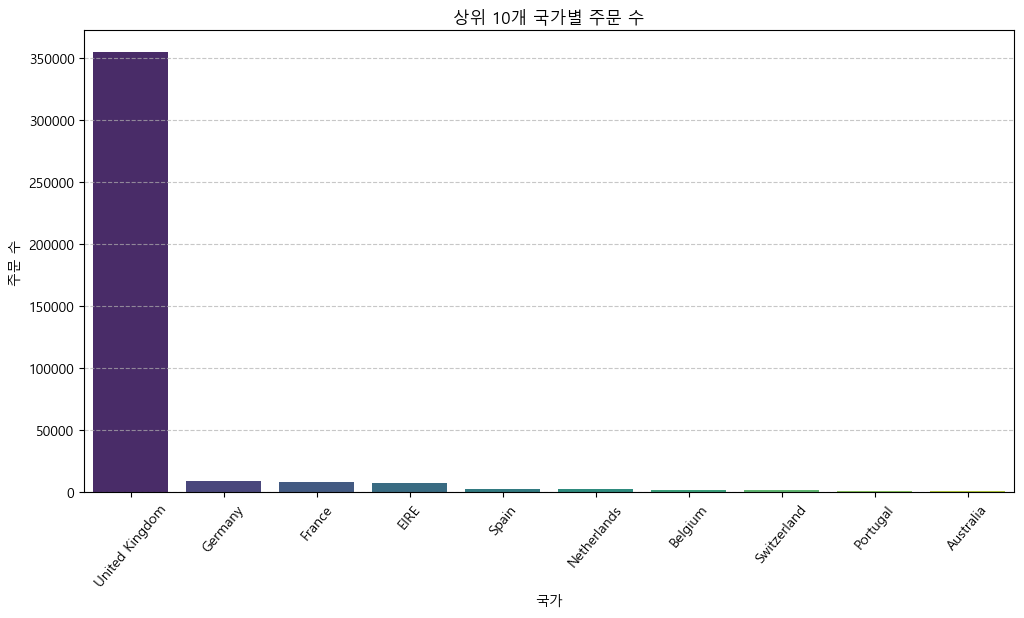

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

top_10_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')

#plt.yscale('log')
plt.title('상위 10개 국가별 주문 수')
plt.xlabel('국가')
plt.ylabel('주문 수')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\sangh\AppData\Local\Temp\ipykernel_10220\3954942279.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_temp['TotalPrice'].resample('M').sum()


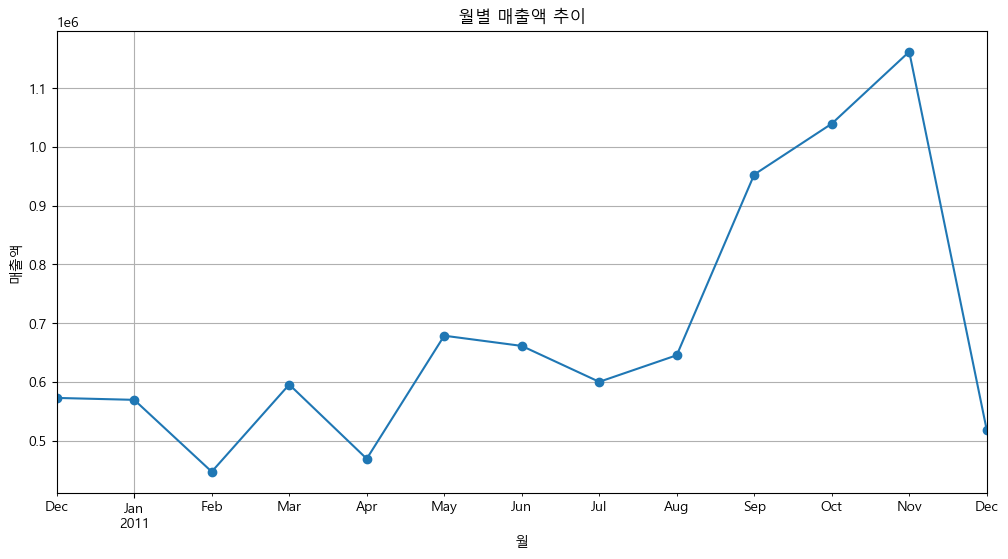

In [26]:
df_temp = df.set_index('InvoiceDate')

monthly_sales = df_temp['TotalPrice'].resample('M').sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('월별 매출액 추이')
plt.xlabel('월')
plt.ylabel('매출액')
plt.grid(True)
plt.show()

## 1. df_temp = df.set_index('InvoiceDate')
이 코드는 InvoiceDate 컬럼을 데이터프레임의 **인덱스(Index)**로 설정하는 역할을 합니다.

set_index('InvoiceDate'): "InvoiceDate 컬럼을 기준으로 데이터를 재정렬하고, 이 컬럼을 행(row)을 대표하는 이름표로 사용하겠다"는 의미입니다.

왜 필요한가? 🗓️: Pandas에서 resample처럼 강력한 시계열 함수를 사용하려면, 데이터가 시간 순서에 따라 정렬되어 있다는 것을 알려줘야 합니다. 날짜/시간 컬럼을 인덱스로 지정하면, Pandas는 이 데이터프레임을 '시계열 데이터'로 인식하고 관련 기능들을 활성화합니다.

비유: 일반적인 목록을 날짜가 적힌 달력으로 바꾸는 것과 같습니다. 일단 달력으로 바뀌면 "1월 데이터만 모아줘" 또는 "매주 금요일 데이터만 뽑아줘" 같은 시간 기반의 작업이 매우 쉬워집니다.

## 2. monthly_sales = df_temp['TotalPrice'].resample('M').sum()
이 코드는 시간 인덱스를 바탕으로 데이터를 월별로 그룹화하고, 각 그룹의 합계를 계산합니다.

df_temp['TotalPrice']: 먼저 우리가 집계하고 싶은 대상인 TotalPrice 컬럼만 선택합니다.

.resample('M') 📥: **리샘플(Resample)**은 시계열 데이터의 시간 간격을 변경하는 기능입니다. 쉽게 말해 시간을 기준으로 데이터를 다시 그룹화하는 것입니다.

'M': 'Month End frequency'의 약자로, "월말"을 기준으로 데이터를 그룹화하라는 의미입니다. 즉, 같은 달에 속한 모든 데이터를 하나의 그룹으로 묶어줍니다.

(참고) 'D'는 일(Day), 'W'는 주(Week), 'Q'는 분기(Quarter) 단위로 그룹화할 수 있습니다.

.sum() ➕: 그룹화된 데이터에 적용할 집계 함수입니다. resample('M')으로 묶인 월별 그룹 내의 모든 TotalPrice 값을 전부 더해서 '월별 총매출액'을 계산합니다. 만약 .mean()을 썼다면 '월별 평균 거래액'이 계산됩니다.

check